# Machine Learning Engineer Nanodegree
## Project 5: Deep Learning Capstone - Number Recognition for SVHN



In [2]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as io
import numpy as np
import csv

import os
from datetime import datetime

In [3]:
train_data = io.loadmat("../data/train_32x32.mat")
test_data = io.loadmat("../data/test_32x32.mat")

train_dataset = train_data['X']
train_labels = train_data['y']
test_dataset = test_data['X']
test_labels = test_data['y']

print('Training set', train_dataset.shape, train_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)    

Training set (32, 32, 3, 73257) (73257, 1)
Test set (32, 32, 3, 26032) (26032, 1)


In [4]:
IMAGE_SIZE = 32
NUM_CLASSES = 10
NUM_CHANNELS = 1
NUM_TRAIN_DATA = 70000

def reformat(dataset, labels):
    dataset = np.transpose(dataset, (3, 0, 1, 2)).astype(np.float32)
    labels = np.array([x[0] for x in labels]) 
    return dataset, labels

valid_dataset = train_dataset[:, :, :, NUM_TRAIN_DATA : ]
valid_labels = train_labels[NUM_TRAIN_DATA : ]
train_dataset = train_dataset[:, :, :, : NUM_TRAIN_DATA]
train_labels = train_labels[ : NUM_TRAIN_DATA]

train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)

print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (70000, 32, 32, 3) (70000,)
Validation set (3257, 32, 32, 3) (3257,)
Test set (26032, 32, 32, 3) (26032,)


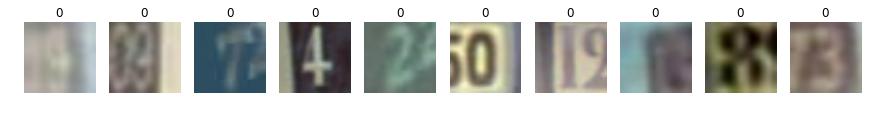

In [5]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
_, ax = plt.subplots(nrows=1, ncols=10)

for i, j in enumerate(np.random.randint(0, train_labels.shape[0], size=10)):
    ax[i].axis('off')
    ax[i].set_title(np.argmax(train_labels[j]), loc='center')
    ax[i].imshow(train_dataset[j])

In [6]:
# def subtract_mean(dataset):
#     for i in range(NUM_CHANNELS):
#         dataset[:, :, :, i] -= np.mean(dataset[:, :, :, i])
#     return dataset

# def normalize(dataset):
#     return dataset / np.std(dataset, axis = 0)

# train_dataset = subtract_mean(train_dataset)
# valid_dataset = subtract_mean(valid_dataset)
# test_dataset = subtract_mean(test_dataset)

def normalize(dataset):
    new_dataset = np.add.reduce(dataset, keepdims=True, axis=3)
    new_dataset = new_dataset / 3.0
    return new_dataset / 128.0 - 1.0

new_train_dataset = normalize(train_dataset)
new_valid_dataset = normalize(valid_dataset)
new_test_dataset = normalize(test_dataset)

print('Training set', new_train_dataset.shape, train_labels.shape)
print('Validation set', new_valid_dataset.shape, valid_labels.shape)
print('Test set', new_test_dataset.shape, test_labels.shape)

Training set (70000, 32, 32, 1) (70000,)
Validation set (3257, 32, 32, 1) (3257,)
Test set (26032, 32, 32, 1) (26032,)


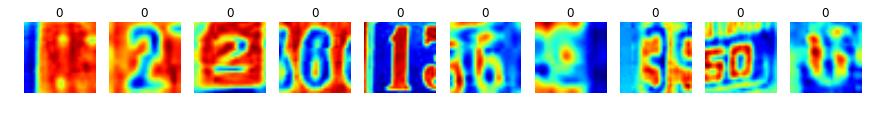

In [7]:
_, ax = plt.subplots(nrows=1, ncols=10)
for i, j in enumerate(np.random.randint(0, train_labels.shape[0], size=10)):
    ax[i].axis('off')
    ax[i].set_title(np.argmax(train_labels[j]), loc='center')
    ax[i].imshow(new_train_dataset[j].squeeze())

In [8]:
def accuracy(predictions, labels):
    sum = 0.0
    for i in range(len(predictions)):
        if predictions[i] == labels[i]:
            sum += 1
    return sum / predictions.shape[0]

In [11]:
from sklearn import svm

flatten_train_dataset = new_train_dataset.reshape((NUM_TRAIN_DATA, IMAGE_SIZE * IMAGE_SIZE))
flatten_test_dataset = new_test_dataset.reshape((test_dataset.shape[0], IMAGE_SIZE * IMAGE_SIZE))

r = [50000]

for dataset_range in r:
    clf = svm.SVC(C = 100, random_state = 5)
    clf.fit(flatten_train_dataset[:dataset_range], train_labels[:dataset_range])
    pred = clf.predict(flatten_test_dataset[:dataset_range])
    accu = accuracy(pred, test_labels[:dataset_range])
    print("Num of dataset: ", dataset_range, "with accuracy: ", accu)

Num of dataset:  50000 with accuracy:  0.730293484942
